In [2]:
#THE EFFECTS OF HISTORICAL HOUSING POLICIES ON RESIDENT EXPOSURE TO INTRA-URBAN HEAT: A STUDY OF 108 US URBAN AREAS
# Import useful packages
import pandas
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels # useful stats package with regression functions
import seaborn as sns # very nice plotting package

# style settings
sns.set_style("white")

# import and print data
df = pandas.read_csv("https://course-resources.minerva.edu/uploaded_files/mu/00294494-8608/redlining.csv") 
data = df.drop(columns=['Region']) #remove this column because the "Nan" string values do not contribute to the analysis
data.dropna() #remove 4 missing values of tree cover in Lake Country & 1 missing value of tree cover G.NYC Area

,Lansat Date,Urban area,State,A δLST,B δLST,C δLST,D δLST,D-A (°C),A Tree cover %,B Tree cover %,C Tree cover %,D Tree cover %
0,29-Jul-17,Joliet,IL,0.70,0.95,-0.10,-0.77,-1.47,15.538567,11.793579,14.338625,16.733715
1,9-Aug-17,Lima,OH,2.64,-2.07,0.08,1.81,-0.83,29.630212,17.495285,18.889741,15.980380
3,1-Aug-14,Pontiac,MI,1.07,-0.15,-0.58,0.68,-0.39,25.732175,30.573424,16.246246,17.307430
4,20-Jun-17,Evansville,IN,-0.08,0.02,0.28,-0.47,-0.39,21.608707,16.392225,16.892633,18.964544
5,5-Jun-14,Saginaw,MI,0.04,-0.16,0.06,-0.10,-0.14,26.461557,22.847605,15.906192,14.476868
...,...,...,...,...,...,...,...,...,...,...,...,...
103,14-Jun-17,San Francisco,CA,-2.16,-1.04,1.02,1.93,4.09,17.488805,8.807723,8.022475,7.156359
104,7-Jun-17,Fresno,CA,-3.49,-0.54,0.40,0.61,4.10,13.358519,8.557843,4.634166,4.081426
105,9-Jun-17,Los Angeles,CA,-3.03,-0.56,0.99,1.18,4.21,13.206908,8.505291,5.675662,4.522813
106,1-Aug-16,Denver,CO,-4.09,-2.08,0.40,2.59,6.68,22.215545,14.253873,9.137111,5.485505


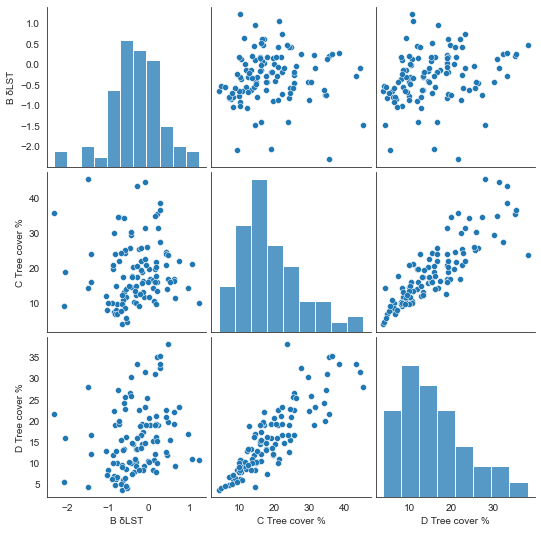

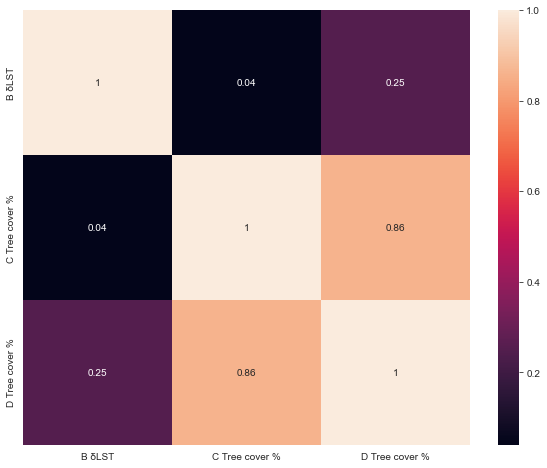

In [37]:
#remove unrelevant variables, only check the correlation of B δLST, D Tree cover %, and C Tree cover %
data_2 = data.drop(columns = ['Lansat Date','Urban area', 'State', 'D-A (°C)', 'C δLST', 'D δLST','A δLST', 'A Tree cover %', 'B Tree cover %'])
corr_map_data_2 = data_2.corr().round(2) #find the pairwise correlation of all columns in the Pandas Dataframe in Python
corr_map_data_2

sns.pairplot(data_2) #create a correlation plot for a pairwise relationship of the variables
plt.figure(figsize=(10,8))
plot = sns.heatmap(data_2.corr().round(2), annot=True) #create a heatmap consisting of the corr.eff of each pair of variables

In [4]:
data_1 = data.dropna()

#THE BELOW IS TAKEN FROM THE CLASS SESSION 3.2 (SYNTHESIS)

def regression_model(column_x, column_y):
    # this function uses built in library functions to create a scatter plot,
    # plots of the residuals, compute R-squared, and display the regression eqn
    
    # fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(data_1[column_x]) #why add_constant
    Y = data_1[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS = "ordinary least squares"
    
    # extract regression parameters from model, rounded to 3 decimal places:
    Rsquared = round(regressionmodel.rsquared,3)
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)
    
    # make plots:
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    sns.regplot(x=column_x, y=column_y, data=data, marker=".", ax=ax1) # scatter plot
    sns.residplot(x=column_x, y=column_y, data=data, ax=ax2) # residual plot
    ax2.set(ylabel='Residuals')
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)
    plt.figure(edgecolor='k') # histogram
    sns.distplot(regressionmodel.resid, kde=True, axlabel='Residuals', color='red')
    
    # print the results:
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)

C:\Users\DMX ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


R-squared =  0.084
Regression equation: D δLST =  -0.034 * D Tree cover % +  1.32


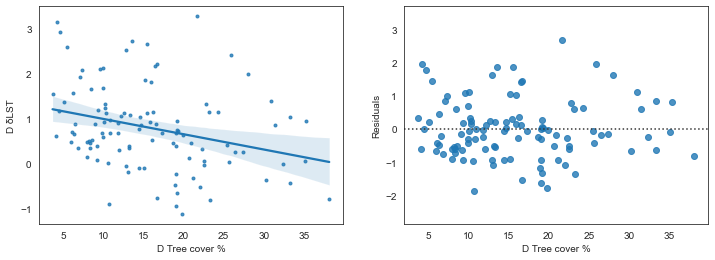

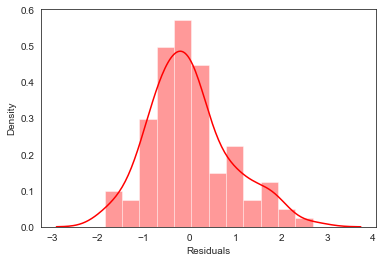

In [5]:
regression_model ("D Tree cover %", "D δLST")


In [6]:
# calcualte r and make a scatter plot for two variables
def corr_scatter(column_a, column_b):
    print("\nThe pearson's r value comparing", column_a, "to", column_b, "is:",round(data_1[column_a].corr(data_1[column_b]),3))
    sns.regplot(x= column_a, y= column_b, data=data, marker=".", x_jitter=.25, y_jitter=.25) 
    # jitter is added to offset data points that are potentially overlapping due to discreteness.
    
print("The corr_scatter(column_a,column_b) function is loaded.")

The corr_scatter(column_a,column_b) function is loaded.



The pearson's r value comparing D Tree cover % to D δLST is: -0.291


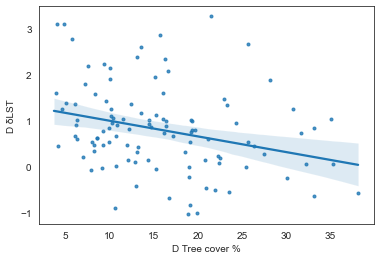

In [7]:
corr_scatter("D Tree cover %", "D δLST")

In [8]:
tree_cover_D = data_1['D Tree cover %'] #filter the column to take values only in the D Tree cover %
tree_cover_D.describe() #method to return the description of the numerical data in the DataFrame

count    106.000000
mean      15.845348
std        8.046114
min        3.710396
25%        9.645955
50%       14.661997
75%       20.450998
max       38.135919
Name: D Tree cover %, dtype: float64

In [9]:
temperature_delta = data_1['D δLST'] #filter the column to take values only in the D δLST
temperature_delta.describe()

count    106.000000
mean       0.789623
std        0.927848
min       -1.120000
25%        0.260000
50%        0.690000
75%        1.172500
max        3.280000
Name: D δLST, dtype: float64

In [16]:
from scipy import stats

r = -0.291 # correlation coefficient
x_bar = 15.845348 # mean of x-values
sx = 8.046114 # standard deviation of x-values
y_bar = 0.789623 # mean of y-values
sy = 0.927848 # standard deviation of y-values
n = 106 # sample size

b1 = (sy/sx)*r # slope of sample regression line
#standard deviation of y-values divide by the standard deviation of x-values, all of which multiply by corr.eff

print("b1 =",b1)

SE = (sy/sx) * ((1-r**2)/(n-2))**0.5 # standard error of the slope
#SD of y-values divide by SD of x-values, multiply by the squareroot of 1-R-squared (co.eff of determination)/(sample size-2)

print("SE =",SE)

t = (b1-0)/SE # t-statistic 
T_corrected = abs(t) # take the absolute value of t
print("t =",t)

p = (1-stats.t.cdf(T_corrected,n-2))*2 # two-tailed test with degrees of freedom (df) = n-2
print("p =", round(p,4))

b1 = -0.03355703983314181
SE = 0.010818329964810646
t = -3.1018687673878103
p = 0.0025


In [17]:
from scipy import stats

# given summary statistics:
r = -0.291 # correlation coefficient
x_bar = 15.845348 # mean of x-values
sx = 8.046114 # standard deviation of x-values
y_bar = 0.789623 # mean of y-values
sy = 0.927848 # standard deviation of y-values
n = 106 # sample size

b1 = (sy/sx)*r # slope of sample regression line
#standard deviation of y-values divide by the standard deviation of x-values, all of which multiply by corr.eff

print("b1 =",b1)

SE = (sy/sx)*(((1-r**2)/(n-2))**(0.5)) # standard error of the slope
#SD of y-values divide by SD of x-values, multiply by the squareroot of 1-R-squared (co.eff of determination)/(sample size-2)

print("SE =",SE)

T = abs(stats.t.ppf(1-0.1/2,n-2)) # t critical value for two-tailed test with (1-alpha)/2 and degrees of freedom = n-2
print("t =",t)

lower_bound = b1 - T*SE 
upper_bound = b1 + T*SE

print("interval =", [lower_bound,upper_bound])

b1 = -0.03355703983314181
SE = 0.010818329964810646
t = -3.1018687673878103
interval = [-0.051511545245457147, -0.015602534420826469]


In [38]:
# run this cell to define the variables and a useful function

# dependent variable:
Y = data_1['D δLST']

# subset of possible independent variables:
predictors_subset = ['A δLST','B δLST','C δLST','A Tree cover %','B Tree cover %','C Tree cover %', 'D Tree cover %']

# function to compute a list of adjusted R^2 values for each predictor
def Rsquared_finder(predictors_list):
    Rsquared_list = []
    for n in range(len(predictors_list[0])):
        if len(predictors_list)==1:
            X = data_1[predictors_list[0][n]]
        elif len(predictors_list)==2:
            X = data_1[[predictors_list[0][n],predictors_list[1]]]
        elif len(predictors_list)==3:
            X = data_1[[predictors_list[0][n],predictors_list[1],predictors_list[2]]]
        X = statsmodels.add_constant(X) # if excluded, the intercept would be 0
        model = statsmodels.OLS(Y, X).fit()
        Rsquared = model.rsquared_adj
        Rsquared_list.append(round(Rsquared,5))
    return Rsquared_list

print('Variables and functions are loaded')

Variables and functions are loaded


In [40]:
# call the R^2 function and output the results
from tabulate import tabulate
Rsquared_list = Rsquared_finder([predictors_subset])
headers = ['Predictor','Adj R^2']
print(tabulate(np.transpose([predictors_subset,Rsquared_list]),headers))

Predictor         Adj R^2
--------------  ---------
A δLST            0.07507
B δLST            0.27703
C δLST            0.00246
A Tree cover %    0.00504
B Tree cover %    0.00849
C Tree cover %   -0.00959
D Tree cover %    0.07561


In [14]:
predictor1 = "D Tree cover %" # insert predictor here as a string

X = data_1[predictor1]
X = statsmodels.add_constant(X) # if excluded, the intercept would be 0
model = statsmodels.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 D δLST   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     9.588
Date:                Sun, 29 Jan 2023   Prob (F-statistic):            0.00252
Time:                        17:13:44   Log-Likelihood:                -137.29
No. Observations:                 106   AIC:                             278.6
Df Residuals:                     104   BIC:                             283.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3205      0.192      6.874      0.000       0.940       1.701
D Tree cover %    -0.0335      0.011     -3.096      0.003      -0.055      -0.012
==============================================================================
Omnibus:                        6.466   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.085
Skew:                           0.576   Prob(JB):                       0.0477
Kurtosis:                       3.224   Cond. No.                         39.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
predictor2 = "C Tree cover %" # insert new predictor here as a string
predictors_setof2 = [predictor1, predictor2]

X = data_1[predictors_setof2]
X = statsmodels.add_constant(X) # if excluded, the intercept would be 0
model = statsmodels.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 D δLST   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     23.38
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           4.25e-09
Time:                        17:16:10   Log-Likelihood:                -122.13
No. Observations:                 106   AIC:                             250.3
Df Residuals:                     103   BIC:                             258.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9906      0.177      5.610      0.000       0.640       1.341
D Tree cover %    -0.1258      0.018     -6.838      0.000      -0.162      -0.089
C Tree cover %     0.0951      0.016      5.841      0.000       0.063       0.127
==============================================================================
Omnibus:                        7.326   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.455
Skew:                           0.650   Prob(JB):                       0.0241
Kurtosis:                       2.987   Cond. No.                         63.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
predictor3 = "B δLST"
predictors_setof3 = [predictor1, predictor2, predictor3]

X = data_1[predictors_setof3]
X = statsmodels.add_constant(X) # if excluded, the intercept would be 0
model = statsmodels.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 D δLST   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     25.38
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           2.41e-12
Time:                        17:42:42   Log-Likelihood:                -112.42
No. Observations:                 106   AIC:                             232.8
Df Residuals:                     102   BIC:                             243.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7414      0.171      4.336      0.000       0.402       1.081
D Tree cover %    -0.0928      0.018     -5.049      0.000      -0.129      -0.056
C Tree cover %     0.0717      0.016      4.540      0.000       0.040       0.103
B δLST            -0.5514      0.122     -4.529      0.000      -0.793      -0.310
==============================================================================
Omnibus:                       16.246   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.557
Skew:                           0.910   Prob(JB):                     9.34e-05
Kurtosis:                       3.944   Cond. No.                         70.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
predictor4 = "A δLST"
predictors_setof4 = [predictor1, predictor2, predictor3, predictor4]

X = data_1[predictors_setof4]
X = statsmodels.add_constant(X) # if excluded, the intercept would be 0
model = statsmodels.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 D δLST   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     21.21
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           1.02e-12
Time:                        17:44:36   Log-Likelihood:                -109.65
No. Observations:                 106   AIC:                             229.3
Df Residuals:                     101   BIC:                             242.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5209      0.192      2.708      0.008       0.139       0.902
D Tree cover %    -0.0896      0.018     -4.963      0.000      -0.125      -0.054
C Tree cover %     0.0682      0.016      4.390      0.000       0.037       0.099
B δLST            -0.5140      0.120     -4.274      0.000      -0.753      -0.275
A δLST            -0.1312      0.056     -2.328      0.022      -0.243      -0.019
==============================================================================
Omnibus:                        8.472   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.334
Skew:                           0.673   Prob(JB):                       0.0155
Kurtosis:                       3.278   Cond. No.                         79.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
predictor5 = "A Tree cover %"
predictors_setof5 = [predictor1, predictor2, predictor3, predictor4, predictor5]

X = data_1[predictors_setof5]
X = statsmodels.add_constant(X) # if excluded, the intercept would be 0
model = statsmodels.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 D δLST   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     16.87
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           4.64e-12
Time:                        17:45:12   Log-Likelihood:                -109.55
No. Observations:                 106   AIC:                             231.1
Df Residuals:                     100   BIC:                             247.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5213      0.193      2.699      0.008       0.138       0.905
D Tree cover %    -0.0892      0.018     -4.915      0.000      -0.125      -0.053
C Tree cover %     0.0727      0.019      3.834      0.000       0.035       0.110
B δLST            -0.5219      0.122     -4.270      0.000      -0.764      -0.279
A δLST            -0.1489      0.071     -2.108      0.038      -0.289      -0.009
A Tree cover %    -0.0037      0.009     -0.419      0.676      -0.021       0.014
==============================================================================
Omnibus:                        8.608   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.477
Skew:                           0.677   Prob(JB):                       0.0144
Kurtosis:                       3.293   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
predictor6 = " Tree cover %"
predictors_setof6 = [predictor1, predictor2, predictor3, predictor4, predictor5, predictor6]

X = data_1[predictors_setof6]
X = statsmodels.add_constant(X) # if excluded, the intercept would be 0
model = statsmodels.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 D δLST   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     8.133
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           3.73e-07
Time:                        22:37:20   Log-Likelihood:                -120.73
No. Observations:                 106   AIC:                             255.5
Df Residuals:                      99   BIC:                             274.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2909      0.210      1.382      0.170      -0.127       0.708
A δLST            -0.2047      0.085     -2.405      0.018      -0.374      -0.036
B δLST            -0.7268      0.141     -5.154      0.000      -1.007      -0.447
C δLST            -0.1187      0.178     -0.666      0.507      -0.473       0.235
A Tree cover %    -0.0075      0.011     -0.663      0.509      -0.030       0.015
B Tree cover %     0.0080      0.019      0.432      0.667      -0.029       0.045
C Tree cover %     0.0004      0.021      0.021      0.983      -0.042       0.043
==============================================================================
Omnibus:                        5.389   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.242
Skew:                           0.545   Prob(JB):                       0.0727
Kurtosis:                       2.994   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
predictor7 = "D Tree cover %"
predictors_setof7 = [predictor1, predictor2, predictor3, predictor4, predictor5, predictor6, predictor7]

X = data_1[predictors_setof7]
X = statsmodels.add_constant(X) # if excluded, the intercept would be 0
model = statsmodels.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 D δLST   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     11.86
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           7.23e-11
Time:                        22:37:21   Log-Likelihood:                -109.43
No. Observations:                 106   AIC:                             234.9
Df Residuals:                      98   BIC:                             256.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5150      0.196      2.631      0.010       0.127       0.903
A δLST            -0.1337      0.078     -1.708      0.091      -0.289       0.022
B δLST            -0.5278      0.134     -3.941      0.000      -0.794      -0.262
C δLST             0.0746      0.166      0.449      0.654      -0.255       0.404
A Tree cover %    -0.0031      0.010     -0.304      0.762      -0.023       0.017
B Tree cover %    -0.0037      0.017     -0.218      0.828      -0.037       0.030
C Tree cover %     0.0783      0.025      3.105      0.002       0.028       0.128
D Tree cover %    -0.0915      0.019     -4.824      0.000      -0.129      -0.054
==============================================================================
Omnibus:                        8.315   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.133
Skew:                           0.663   Prob(JB):                       0.0171
Kurtosis:                       3.288   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


The pearson's r value comparing ['A δLST'] to ['B δLST'] is: 1.0


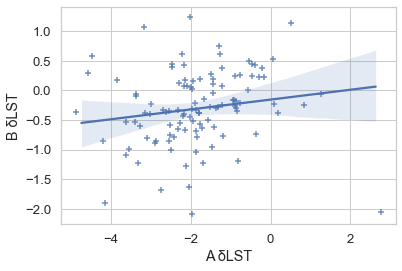

In [94]:
# calcualte r and make a scatter plot for two variables
def corr_scatter(column_a, column_b):
    print("\nThe pearson's r value comparing", [column_a] , "to", [column_b] , "is:",round(data_1[column_a].corr(data_1[column_a]),3))
    sns.regplot(x= column_a, y= column_b, data=data, marker="+", x_jitter=.25, y_jitter=.25) # jitter is added to offset data points that are potentially overlapping due to discreteness.
    
corr_scatter('A δLST', 'B δLST')
corr_scatter('A δLST', 'B δLST')